#### Bi 410/510 (Fall 2019)

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or `"YOUR ANSWER HERE"`.

When you are finished submit this notebook through Canvas.

# <span style="color:steelblue;">Milestone 6A</span>

### <span style="color:steelblue;">Instructions</span>

For this exam you need to write one Python function, create two plots using Matplotlib, and answer one short-answer question.

The data for the plots is in the file named `finances.csv` (download it from the Bi 410 server and save it in the same folder as this notebook).  Each line in this file defines one financial transaction, with the following items on each line:
* transaction date
* payee (usually a business name)
* amount
* expense category

As you work on the projects write your Python code in the cells that have a comment that says `"YOUR CODE HERE"` or `"YOUR ANSWER HERE"`.

**IMPORTANT:** Do not copy or delete these cells.

You can add additional "sandbox" cells if you wish, but make sure you don't duplicate a solution cell.

To get the data for the first plot you need to call a function named `parse_annual_spending`, which we have already written for you.  When this function is passed the name of a file with transaction records it returns two lists.  The first is a list of months, and the second is the total amount spent in a month.

For example, the small file named `demo_transactions.csv` has these 6 transactions:
```
    2018-01-03,Safeway,30.00,food
    2018-01-07,Jerrys,15.00,home
    2018-02-08,Hirons,3.00,home
    2018-02-09,Newmans,10.00,food
    2018-03-09,Safeway,20.00,food
    2018-03-09,Chevron,10.00,car
```

This file shows transactions from three months (`01`, `02`, and `03`). The total spent in those months was $\$$45.00 in `01`, $\$$13.00 in `02`, and $\$$30.00 in `03`:
```
>>> months, dollars = parse_annual_spending('demo_transactions.csv')
>>> months
['01', '02', '03']
>>> dollars
[45.0, 13.0, 30.0]
```

### <span style="color:steelblue;">Imports</span>

Execute this code cell to import Matplotlib and tell Jupyter to display plots in this notebook:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

### <span style="color:steelblue;">Graph of Annual Spending</span>

Execute this code cell to define the parsing function:

In [2]:
def parse_annual_spending(fn):
    current = None
    months = [ ]
    spending = [ ]
    with open(fn) as f:
        for line in f:
            date, payee, amount, category = line.strip().split(',')
            yr, mon, day = date.split('-')
            if mon != current:
                months.append(mon)
                spending.append(0)
                current = mon
            spending[-1] += float(amount)
    return months, spending

Write a Python statement that calls the parser and saves the two lists it returns (you'll need these lists to make the plot):

In [3]:
months, dollars = parse_annual_spending('finances.csv')

Fill in the code cell below to generate a graph that shows the total spending over the year, plotting one point per month.  The $x$-axis should show the months, the $y$-axis should be the amount spent in each month.  Your plot should have a title and labels on the $x$ and $y$ axes (but you can use any line styles and colors).

Note that the $y$-axis should range from 0 to 1000.

The plot should look something like this:

<img src="https://pages.uoregon.edu/conery/Bi410/annual_spending.png">

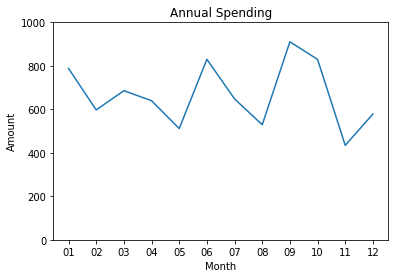

In [4]:
# YOUR CODE HERE
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Annual Spending')
plt.ylim(0, 1000)
plt.plot(months, dollars)

### <span style="color:steelblue;">Spending by Category</span>

Write a function named `parse_categories`.  Like the previous parsing function, it will be passed the name of a file with financial transactions, but this time the return value should be a dictionary where the keys are spending categories and the values are the total amount spent in each category.

The demo file has transactions in three categories (home, food, car).  The dictionary you build for this data should look something like this:
```
>>> parse_categories('demo_transactions.csv')
{'food': 60.0, 'home': 18.0, 'car': 10.0}
```

In [5]:
from collections import defaultdict
def parse_categories(fn):
    dictionary=defaultdict(float)
    with open(fn) as f:
        for line in f:
            date, payee, amount, category = line.strip().split(',')
            amount=float(amount)
            dictionary[category] += amount
    return dictionary

##### Sandbox 

You can use this cell to test your function on the demo data.  The expected result is shown above.

In [6]:
parse_categories('demo_transactions.csv')

defaultdict(float, {'food': 60.0, 'home': 18.0, 'car': 10.0})

##### Tests 

When your function is workng execute this code cell to parse the file and save the results:

In [7]:
categories = parse_categories('finances.csv')

We'll grade your program using these cells.

In [8]:
assert sorted(list(categories.keys())) == ['car', 'food', 'home']

In [9]:
assert round(sum(categories.values()),2) == 7982.62

### <span style="color:steelblue;">Plot Spending by Category</span>

Use the code cell below to produce a bar chart that shows total spending in each category.  Your chart should have a title and a label on the $y$-axis, but you can use any colors or other style variations you want.  The categories can appear in any order.

The data for this plot is in the dictionary named `categories` that was created by the test cells in the previous project.

Your plot should look something like this:

<img src="https://pages.uoregon.edu/conery/Bi410/spending_categories.png">

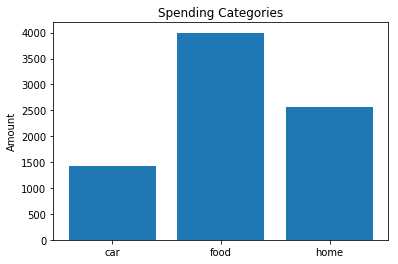

In [10]:
# YOUR CODE HERE
plt.bar(categories.keys(), categories.values())
plt.ylabel("Amount")
plt.title('Spending Categories')
plt.show()

### <span style="color:red;">Short Answer Question</span>

Don't forget to complete the short-answer question on the exam page.

Double-click on the markdown cell below and enter your answer in this cell.

plt.scatter(dates, amounts, c= categories) would return a graph with dates on the x axis, amounts on y axis and different points on the graph grouped together representing the category of the item. The number representing each category can be mapped onto colours using cmap or norm so different category points are represented by different colours.